In [ ]:
pip install meteostat pandas

In [ ]:
from datetime import datetime
import meteostat as mt
import pandas as pd

In [ ]:
df.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1992-08-01,29.1,26.8,31.9,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1992-08-02,28.7,26.8,30.7,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1992-08-03,29.5,27.4,32.0,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1992-08-04,29.5,27.4,31.8,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1992-08-05,29.4,27.6,31.8,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
from datetime import datetime
import meteostat as mt
import pandas as pd

start = datetime(1990, 1, 1)
end = datetime(2025, 8, 23)


location_id = '45007'  # Replace XYZ123 with the desired weather station ID


data = mt.Daily(location_id, start, end)
data = data.fetch()

df = pd.DataFrame(data)

In [ ]:
df.head()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1990-01-01,16.8,15.0,18.0,<NA>,<NA>,<NA>,14.0,<NA>,<NA>,<NA>
1990-01-02,16.8,15.0,18.0,<NA>,<NA>,<NA>,7.9,<NA>,<NA>,<NA>
1990-01-03,16.5,15.0,18.0,<NA>,<NA>,<NA>,17.4,<NA>,<NA>,<NA>
1990-01-04,16.6,16.0,18.0,<NA>,<NA>,<NA>,22.3,<NA>,<NA>,<NA>
1990-01-05,17.8,16.0,20.0,<NA>,<NA>,<NA>,20.1,<NA>,<NA>,<NA>


# Q1) Temperature Trends
Has the average temperature generally increased over time?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12880 entries, 1990-01-01 to 2025-08-23
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tavg    12874 non-null  Float64
 1   tmin    11002 non-null  Float64
 2   tmax    11002 non-null  Float64
 3   prcp    1161 non-null   Float64
 4   snow    0 non-null      Float64
 5   wdir    0 non-null      Float64
 6   wspd    12879 non-null  Float64
 7   wpgt    0 non-null      Float64
 8   pres    2618 non-null   Float64
 9   tsun    0 non-null      Float64
dtypes: Float64(10)
memory usage: 1.2 MB


In [ ]:
# we create a new col that contain the same data but in datetime format
df['time_dt'] = pd.to_datetime(df.index)
df['year'] = (df['time_dt']).dt.year
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,time_dt,year
time,,,,,,,,,,,,
1990-01-01,16.8,15.0,18.0,<NA>,<NA>,<NA>,14.0,<NA>,<NA>,<NA>,1990-01-01,1990
1990-01-02,16.8,15.0,18.0,<NA>,<NA>,<NA>,7.9,<NA>,<NA>,<NA>,1990-01-02,1990
1990-01-03,16.5,15.0,18.0,<NA>,<NA>,<NA>,17.4,<NA>,<NA>,<NA>,1990-01-03,1990
1990-01-04,16.6,16.0,18.0,<NA>,<NA>,<NA>,22.3,<NA>,<NA>,<NA>,1990-01-04,1990
1990-01-05,17.8,16.0,20.0,<NA>,<NA>,<NA>,20.1,<NA>,<NA>,<NA>,1990-01-05,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-19,28.2,26.6,28.7,28.4,<NA>,<NA>,13.1,<NA>,1010.5,<NA>,2025-08-19,2025
2025-08-20,29.5,28.5,31.0,17.3,<NA>,<NA>,12.9,<NA>,1010.4,<NA>,2025-08-20,2025
2025-08-21,29.9,28.5,32.1,0.9,<NA>,<NA>,9.5,<NA>,1011.2,<NA>,2025-08-21,2025


<Axes: xlabel='year'>

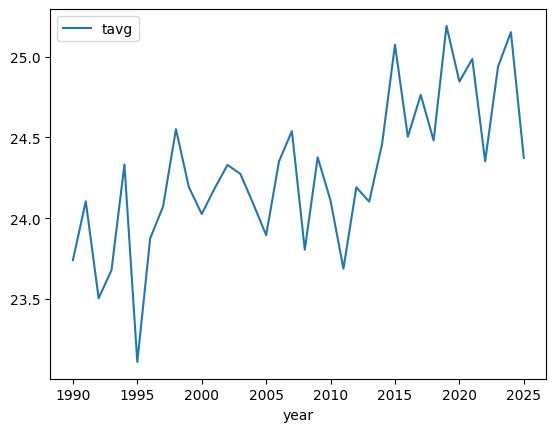

In [ ]:
df.groupby(by='year').agg({'tavg':'mean'}).plot(kind='line')

# Q2) Seasonal Changes
a. Do the seasons look different compared to the past?

b. Is winter colder, warmer, or shorter than before?

In [ ]:
df['time_dt'] = pd.to_datetime(df.index)
df['months'] = (df['time_dt']).dt.month
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,time_dt,year,months
time,,,,,,,,,,,,,
1990-01-01,16.8,15.0,18.0,<NA>,<NA>,<NA>,14.0,<NA>,<NA>,<NA>,1990-01-01,1990,1
1990-01-02,16.8,15.0,18.0,<NA>,<NA>,<NA>,7.9,<NA>,<NA>,<NA>,1990-01-02,1990,1
1990-01-03,16.5,15.0,18.0,<NA>,<NA>,<NA>,17.4,<NA>,<NA>,<NA>,1990-01-03,1990,1
1990-01-04,16.6,16.0,18.0,<NA>,<NA>,<NA>,22.3,<NA>,<NA>,<NA>,1990-01-04,1990,1
1990-01-05,17.8,16.0,20.0,<NA>,<NA>,<NA>,20.1,<NA>,<NA>,<NA>,1990-01-05,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-19,28.2,26.6,28.7,28.4,<NA>,<NA>,13.1,<NA>,1010.5,<NA>,2025-08-19,2025,8
2025-08-20,29.5,28.5,31.0,17.3,<NA>,<NA>,12.9,<NA>,1010.4,<NA>,2025-08-20,2025,8
2025-08-21,29.9,28.5,32.1,0.9,<NA>,<NA>,9.5,<NA>,1011.2,<NA>,2025-08-21,2025,8


In [ ]:
summer_df = df[df['months'].isin ([6, 7, 8])]
summer_df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,time_dt,year,months
time,,,,,,,,,,,,,
1990-06-01,26.1,25.0,27.0,<NA>,<NA>,<NA>,8.0,<NA>,<NA>,<NA>,1990-06-01,1990,6
1990-06-02,24.9,24.0,26.0,<NA>,<NA>,<NA>,15.1,<NA>,<NA>,<NA>,1990-06-02,1990,6
1990-06-03,24.4,23.0,26.0,<NA>,<NA>,<NA>,11.5,<NA>,<NA>,<NA>,1990-06-03,1990,6
1990-06-04,27.0,25.0,30.0,<NA>,<NA>,<NA>,9.0,<NA>,<NA>,<NA>,1990-06-04,1990,6
1990-06-05,26.8,<NA>,<NA>,<NA>,<NA>,<NA>,12.8,<NA>,<NA>,<NA>,1990-06-05,1990,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-08-19,28.2,26.6,28.7,28.4,<NA>,<NA>,13.1,<NA>,1010.5,<NA>,2025-08-19,2025,8
2025-08-20,29.5,28.5,31.0,17.3,<NA>,<NA>,12.9,<NA>,1010.4,<NA>,2025-08-20,2025,8
2025-08-21,29.9,28.5,32.1,0.9,<NA>,<NA>,9.5,<NA>,1011.2,<NA>,2025-08-21,2025,8


In [ ]:
winter_df = df[df['months'].isin ([12, 1, 2])]
winter_df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,time_dt,year,months
time,,,,,,,,,,,,,
1990-01-01,16.8,15.0,18.0,<NA>,<NA>,<NA>,14.0,<NA>,<NA>,<NA>,1990-01-01,1990,1
1990-01-02,16.8,15.0,18.0,<NA>,<NA>,<NA>,7.9,<NA>,<NA>,<NA>,1990-01-02,1990,1
1990-01-03,16.5,15.0,18.0,<NA>,<NA>,<NA>,17.4,<NA>,<NA>,<NA>,1990-01-03,1990,1
1990-01-04,16.6,16.0,18.0,<NA>,<NA>,<NA>,22.3,<NA>,<NA>,<NA>,1990-01-04,1990,1
1990-01-05,17.8,16.0,20.0,<NA>,<NA>,<NA>,20.1,<NA>,<NA>,<NA>,1990-01-05,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-24,15.0,12.5,18.7,0.0,<NA>,<NA>,17.4,<NA>,1028.4,<NA>,2025-02-24,2025,2
2025-02-25,16.5,14.7,19.1,0.0,<NA>,<NA>,16.0,<NA>,1026.3,<NA>,2025-02-25,2025,2
2025-02-26,17.4,15.9,21.2,1.6,<NA>,<NA>,12.8,<NA>,1023.2,<NA>,2025-02-26,2025,2


<Axes: xlabel='year'>

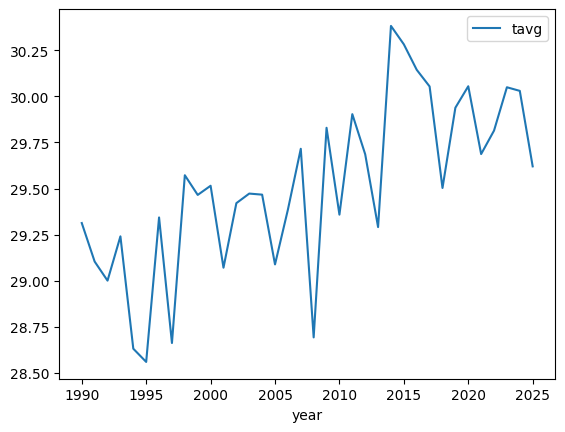

In [ ]:
summer_df.groupby(by='year').agg({'tavg':'mean'}).plot(kind='line')

<Axes: xlabel='year'>

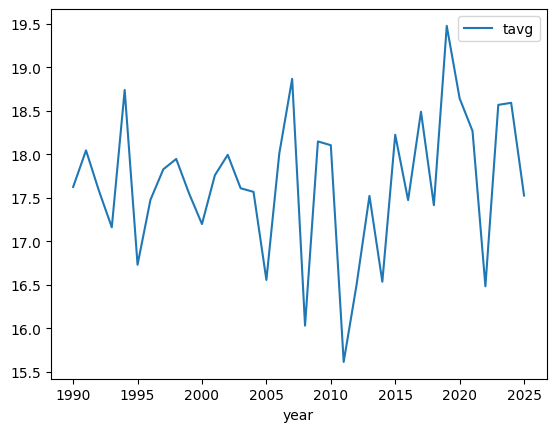

In [ ]:
winter_df.groupby(by='year').agg({'tavg':'mean'}).plot(kind='line')

#Q3) Other Observations

In [ ]:
df.describe()

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,time_dt,year,months
count,12874.0,11002.0,11002.0,1161.0,0.0,0.0,12879.0,0.0,2618.0,0.0,12880,12880.000000,12880.000000
mean,24.289638,22.138175,27.035439,5.535228,<NA>,<NA>,15.719489,<NA>,1012.322918,<NA>,2007-12-06 13:30:33.540372736,2007.434161,6.481677
min,4.8,3.0,7.0,0.0,<NA>,<NA>,3.5,<NA>,988.2,<NA>,1990-01-01 00:00:00,1990.000000,1.000000
25%,20.2,18.0,23.0,0.0,<NA>,<NA>,11.7,<NA>,1007.2,<NA>,1999-02-04 18:00:00,1999.000000,4.000000
50%,25.5,23.2,28.0,0.8,<NA>,<NA>,14.8,<NA>,1011.9,<NA>,2007-12-30 12:00:00,2007.000000,6.000000
75%,28.9,27.0,31.7,5.3,<NA>,<NA>,18.7,<NA>,1017.4,<NA>,2016-10-27 06:00:00,2016.000000,9.000000
max,33.5,31.6,37.0,126.7,<NA>,<NA>,63.4,<NA>,1030.6,<NA>,2025-08-23 00:00:00,2025.000000,12.000000
std,5.318539,5.39219,5.443172,12.001803,<NA>,<NA>,5.535475,<NA>,6.540226,<NA>,NaN,10.278195,3.442423


<Axes: xlabel='year'>

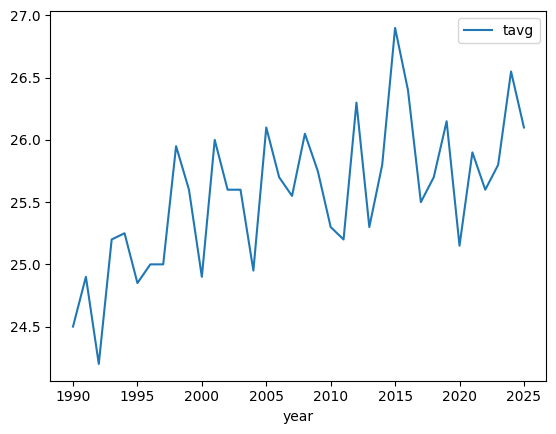

In [ ]:
df.groupby(by='year').agg({'tavg':'median'}).plot(kind='line')

<Axes: xlabel='year'>

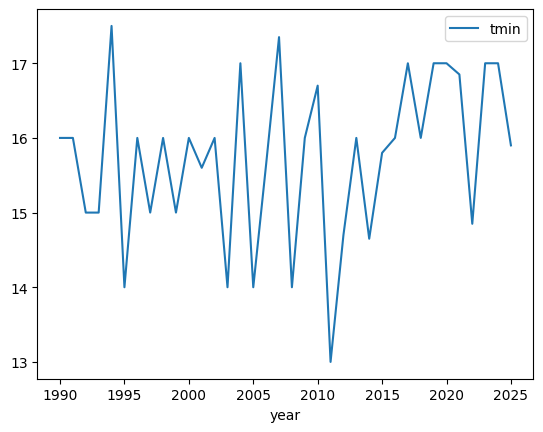

In [ ]:
winter_df.groupby(by='year').agg({'tmin':'median'}).plot(kind='line')

<Axes: xlabel='year'>

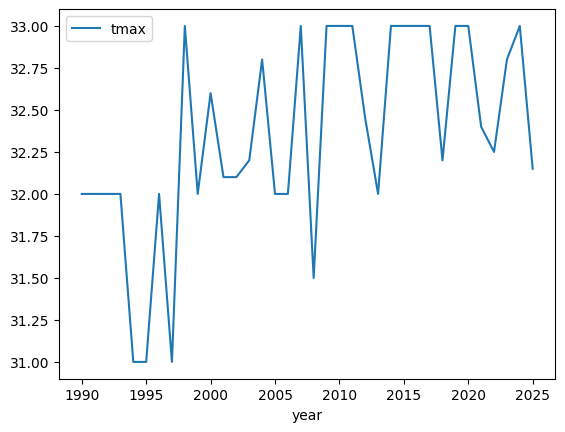

In [ ]:
summer_df.groupby(by='year').agg({'tmax':'median'}).plot(kind='line')

In [ ]:
df.groupby(by='year').agg({'prcp':'mean'})

,prcp
year,
1990,<NA>
1991,<NA>
1992,<NA>
1993,<NA>
1994,<NA>
1995,<NA>
1996,<NA>
1997,<NA>
1998,<NA>


In [ ]:
df.groupby(by='year').agg({'tavg':'mean'})

,tavg
year,
1990,23.740331
1991,24.104986
1992,23.504789
1993,23.680392
1994,24.332584
1995,23.111076
1996,23.875623
1997,24.072853
1998,24.551404


In [ ]:
winter_df.groupby(by='year').agg({'tavg':'mean'})

,tavg
year,
1990,17.623864
1991,18.04382
1992,17.581111
1993,17.160674
1994,18.737647
1995,16.730588
1996,17.475824
1997,17.826744
1998,17.945349
